In [177]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb


In [178]:
aqi_data_loc = "/Users/isroilov/Downloads/tashkent-yunusabad-air-quality.csv"

aqi_df = pd.read_csv(aqi_data_loc)

In [179]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    498 non-null    object
 1    pm25   498 non-null    object
 2    pm10   498 non-null    object
 3    o3     498 non-null    object
 4    no2    498 non-null    object
 5    so2    498 non-null    object
 6    co     498 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


In [180]:
aqi_df.columns = [col.strip() for col in aqi_df.columns]

In [181]:
aqi_df["date"] = pd.to_datetime(aqi_df["date"])
aqi_df["pm10"] = pd.to_numeric(aqi_df["pm10"], errors='coerce')
aqi_df["pm25"] = pd.to_numeric(aqi_df["pm25"], errors='coerce')
aqi_df["no2"] = pd.to_numeric(aqi_df["no2"], errors='coerce')
aqi_df["so2"] = pd.to_numeric(aqi_df["so2"], errors='coerce')
aqi_df["o3"] = pd.to_numeric(aqi_df["o3"], errors='coerce')
aqi_df["co"] = pd.to_numeric(aqi_df["co"], errors='coerce')

In [182]:
aqi_df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024-01-01,45.0,44.0,NaN,NaN,3.0,9.0
1,2024-01-02,81.0,81.0,NaN,NaN,5.0,11.0
2,2024-01-03,149.0,45.0,NaN,NaN,3.0,6.0
3,2024-01-04,65.0,35.0,NaN,NaN,6.0,6.0
4,2024-01-05,65.0,36.0,NaN,NaN,4.0,6.0


In [183]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    498 non-null    datetime64[ns]
 1   pm25    305 non-null    float64       
 2   pm10    305 non-null    float64       
 3   o3      0 non-null      float64       
 4   no2     168 non-null    float64       
 5   so2     346 non-null    float64       
 6   co      471 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 27.4 KB


In [184]:
aqi_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,498,305.000000,305.000000,0.0,168.000000,346.000000,471.000000
mean,2024-03-21 22:01:26.746987776,66.950820,40.452459,NaN,4.476190,3.919075,4.881104
min,2023-02-10 00:00:00,20.000000,11.000000,NaN,2.000000,1.000000,1.000000
25%,2023-07-26 06:00:00,49.000000,30.000000,NaN,4.000000,1.000000,3.000000
50%,2023-12-29 12:00:00,61.000000,38.000000,NaN,4.000000,3.000000,4.000000
75%,2025-02-19 18:00:00,79.000000,48.000000,NaN,5.000000,5.000000,6.000000
max,2025-07-01 00:00:00,165.000000,157.000000,NaN,13.000000,33.000000,27.000000
std,NaN,27.735372,16.991054,NaN,1.422456,3.566240,3.525995


In [185]:
aqi_df = aqi_df.drop(columns=['o3', 'no2'])


In [186]:
aqi_df.sort_values(by='date', inplace=True)
aqi_df.reset_index(drop=True, inplace=True)

In [187]:
aqi_df.head()

,date,pm25,pm10,so2,co
0,2023-02-10,NaN,36.0,6.0,3.0
1,2023-02-11,76.0,NaN,5.0,4.0
2,2023-02-12,NaN,58.0,5.0,6.0
3,2023-02-13,95.0,41.0,13.0,7.0
4,2023-02-14,83.0,40.0,4.0,7.0


<bound method Axes.set of <Axes: title={'center': 'CO Levels Over Time'}>>

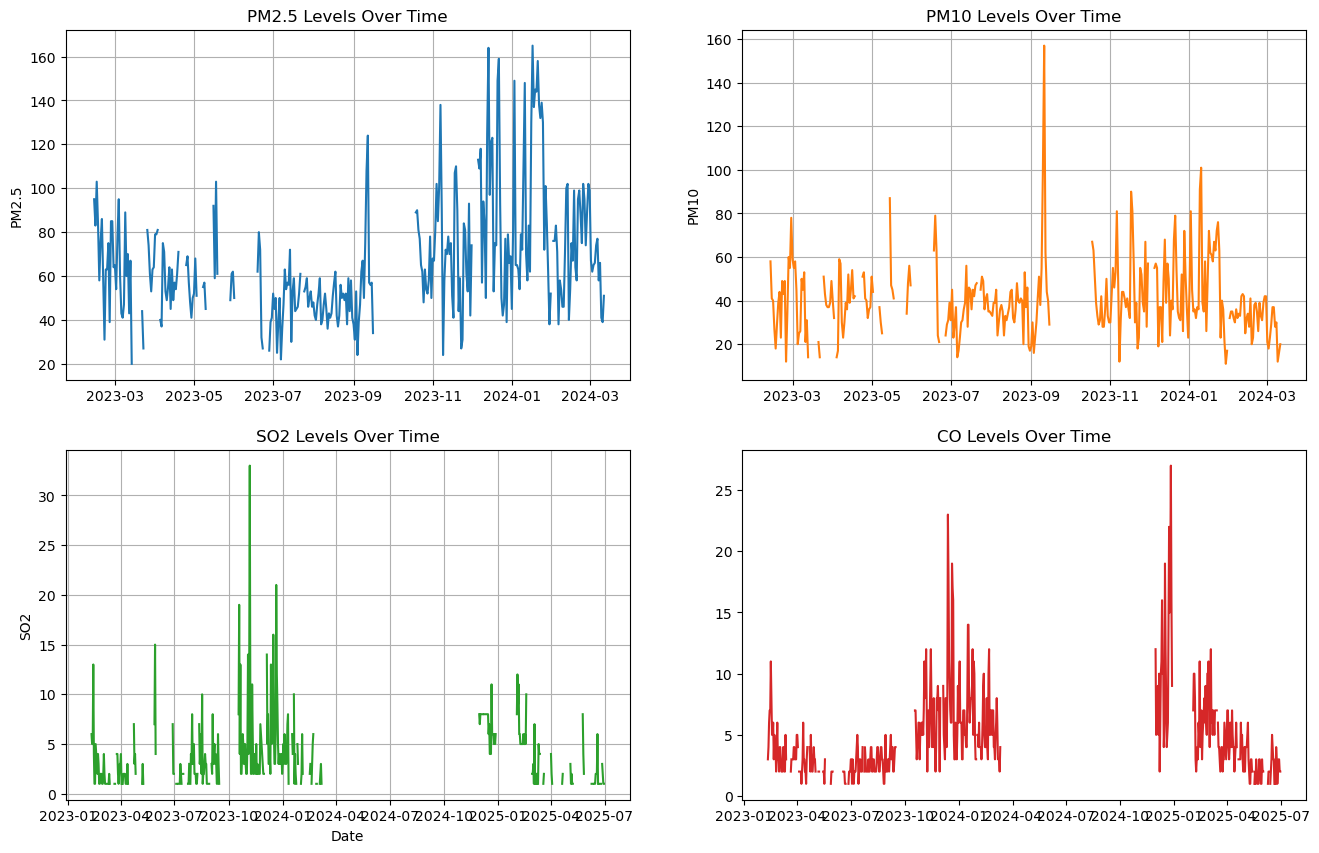

In [188]:

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# --- Plot for PM2.5 (Top-Left) ---
axes[0, 0].plot(aqi_df['date'], aqi_df['pm25'], color='tab:blue')
axes[0, 0].set_title('PM2.5 Levels Over Time')
axes[0, 0].set_ylabel('PM2.5')
axes[0, 0].grid(True)

# --- Plot for PM10 (Top-Right) ---
axes[0, 1].plot(aqi_df['date'], aqi_df['pm10'], color='tab:orange')
axes[0, 1].set_title('PM10 Levels Over Time')
axes[0, 1].set_ylabel('PM10')
axes[0, 1].grid(True)

# --- Plot for SO2 (Bottom-Left) ---
axes[1, 0].plot(aqi_df['date'], aqi_df['so2'], color='tab:green')
axes[1, 0].set_title('SO2 Levels Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('SO2')
axes[1, 0].grid(True)

# --- Plot for CO (Bottom-Right) ---
axes[1, 1].plot(aqi_df['date'], aqi_df['co'], color='tab:red')
axes[1, 1].set_title('CO Levels Over Time')
axes[1, 1].set

The plot shows that there is a huge chunk of data missing in the period of 2024-03 -> 2024-11 in SO2 levels and CO levels column. Also, pm25 and pm10 are missing just after 2024-03. Therefore we remove all the records after 2024-03.

In [189]:
aqi_df[aqi_df['date'] > '2024-03'].head(20)

,date,pm25,pm10,so2,co
312,2024-03-02,67.0,18.0,NaN,3.0
313,2024-03-03,62.0,23.0,NaN,5.0
314,2024-03-04,65.0,29.0,1.0,6.0
315,2024-03-05,66.0,37.0,2.0,8.0
316,2024-03-06,74.0,37.0,3.0,6.0
317,2024-03-07,77.0,28.0,1.0,3.0
318,2024-03-08,58.0,30.0,NaN,3.0
319,2024-03-09,66.0,12.0,NaN,3.0
320,2024-03-10,41.0,16.0,NaN,2.0
321,2024-03-11,39.0,20.0,NaN,4.0


In [190]:
aqi_df = aqi_df[aqi_df['date'] <= '2024-03-11']

In [191]:
aqi_df.set_index('date', inplace=True)

In [200]:
for_test = aqi_df.copy()

In [201]:
for i in range(1, 6):
    for_test[f'pm25_lag{i}'] = for_test['pm25'].shift(i)
for_test['pm25_lag24'] = for_test['pm25'].shift(24)

In [202]:
for_test['pm25_rolling_mean_6'] = for_test['pm25'].rolling(window=6).mean()
for_test['pm25_rolling_std_6'] = for_test['pm25'].rolling(window=6).std()

In [203]:
Y = for_test['pm25']
X = for_test.drop(columns=['pm25'], axis=1)

In [204]:
combined_df = pd.concat([X, Y], axis=1)
cleaned_df = combined_df.dropna()
Y = cleaned_df['pm25']
X = cleaned_df.drop(columns=['pm25'], axis=1)

In [205]:
split_point = int(len(cleaned_df)*0.8)

X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

In [206]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(121, 11) (121,)
(31, 11) (31,)


In [207]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05    # XGBoost handles NaNs by default, no special parameter needed
)

model.fit(X_train, Y_train,
          eval_set=[(X_test, Y_test)],
          verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate the metrics
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 23.00
Root Mean Squared Error (RMSE): 27.76
R-squared (R2): 0.35
